In [20]:
from google.colab import files
uploaded = files.upload()


Saving Fraud_check.csv to Fraud_check (4).csv


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
Fdata = pd.read_csv(r'Fraud_check.csv')

In [23]:
Fdata.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [24]:
Fdata.shape

(600, 6)

In [25]:
Fdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [26]:
Fdata.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [27]:
Fdata.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [28]:
#transforming Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder

colname=['Undergrad','Marital.Status','Urban']

le=LabelEncoder()

for x in colname:
    Fdata[x]=le.fit_transform(Fdata[x])

In [29]:
Fdata.dtypes

Undergrad          int64
Marital.Status     int64
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int64
dtype: object

In [30]:
Fdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [31]:
Fdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


<Axes: >

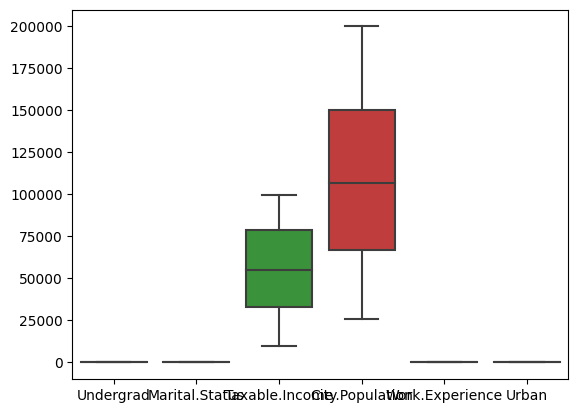

In [32]:
sns.boxplot(Fdata)

<Axes: >

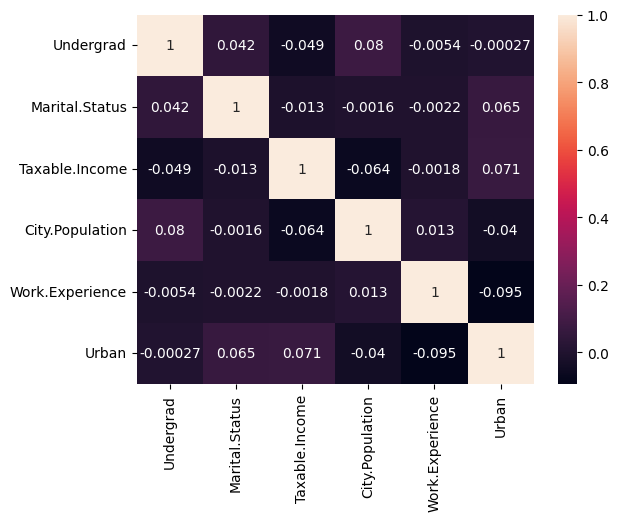

In [33]:
sns.heatmap(Fdata.corr(), annot = True)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:
Fdata.isnull().sum()


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [36]:

# Binning the Taxable.Income variable as Risky and Good
Fdata['Taxable.Income'] = pd.cut(Fdata['Taxable.Income'], 
                              bins=[0, 30000, 100000], 
                              labels=['Risky', 'Good'])


In [37]:
# Split the dataset into features and target
X = Fdata.drop('Taxable.Income', axis=1)
y = Fdata['Taxable.Income']

In [67]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [68]:
# Initializing the Random Forest classifier with default parameters
rfc = RandomForestClassifier()



In [69]:
# Fitting the model on the training data
rfc.fit(X_train, y_train)




RandomForestClassifier()

In [70]:
# Predicting the target variable for the test data
y_pred = rfc.predict(X_test)


In [71]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", accuracy)



Accuracy of the model:  0.7666666666666667


In [72]:
# Generating the classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        Good       0.79      0.97      0.87       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.77       180
   macro avg       0.39      0.48      0.43       180
weighted avg       0.63      0.77      0.69       180

Confusion Matrix:
 [[138   5]
 [ 37   0]]
